### %% [markdown]
### # Re-plotting Active Subspace Results
###
### This notebook loads the CSVs you created:
### - `eigenvalues.csv`
### - `eigenvalue_errorbars.csv`
### - `eigenvector_PC1.csv`
### - `subspace_errors.csv`
### - `sufficient_summary.csv`
###
### and re-creates the standard Active Subspaces plots with Matplotlib.
##

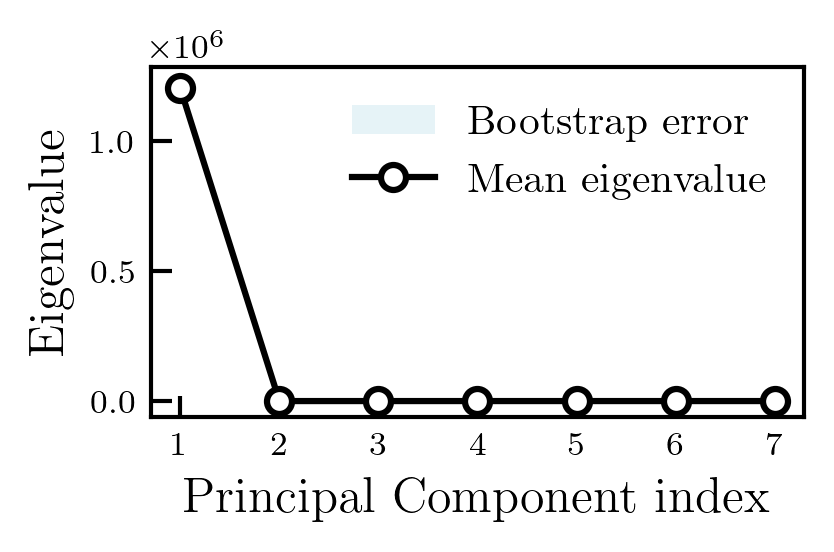

In [142]:
# %% [code]
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "axes.linewidth": 1.0,
    "xtick.major.width": 1.0,
    "ytick.major.width": 1.0,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "errorbar.capsize": 3,
})

plot_dir = "figs/NH3_NP_CF/UQ_OH_analysis_noise_10/N_30/plots"
# plot_dir = "figs/NH3_NP_CF/UQ_NH_analysis_noise_10/N_30/plots"
# plot_dir = "figs/NH3_NP_CF/UQ_analysis/N_30/plots"


# load
eigvals = np.loadtxt(os.path.join(plot_dir, "eigenvalues.csv"),
                     delimiter=",", skiprows=1)
e_br    = np.loadtxt(os.path.join(plot_dir, "eigenvalue_errorbars.csv"),
                     delimiter=",", skiprows=1)

# assume e_br[:,0]=lower, e_br[:,1]=upper
y_lower = e_br[:,0]
y_upper = e_br[:,1]
x       = np.arange(1, len(eigvals)+1)

fig, ax = plt.subplots(figsize=(3, 2))

# bootstrap error region
ax.fill_between(
    x, y_lower, y_upper,
    color="#add8e6", alpha=0.3, linewidth=0.0,
    label="Bootstrap error"
)

# mean eigenvalues
ax.plot(
    x, eigvals, 'o-',
    linewidth=1.5, markeredgewidth=1.5,
    markerfacecolor='white', color='k',
    label="Mean eigenvalue"
)

ax.set_xlabel(r"Principal Component index")
ax.set_ylabel(r"Eigenvalue")
ax.set_xticks(x)

# legend
ax.legend(frameon=False, loc="upper right", fontsize=10)

# spines, ticks, layout
for spine in ax.spines.values():
    spine.set_linewidth(1.0)
ax.tick_params(direction='in', which='both')
ax.grid(False)

out_pdf = os.path.join(plot_dir, "vector_plot_eigenvalue.pdf")
fig.savefig(out_pdf, bbox_inches="tight")
fig.tight_layout()
plt.show()

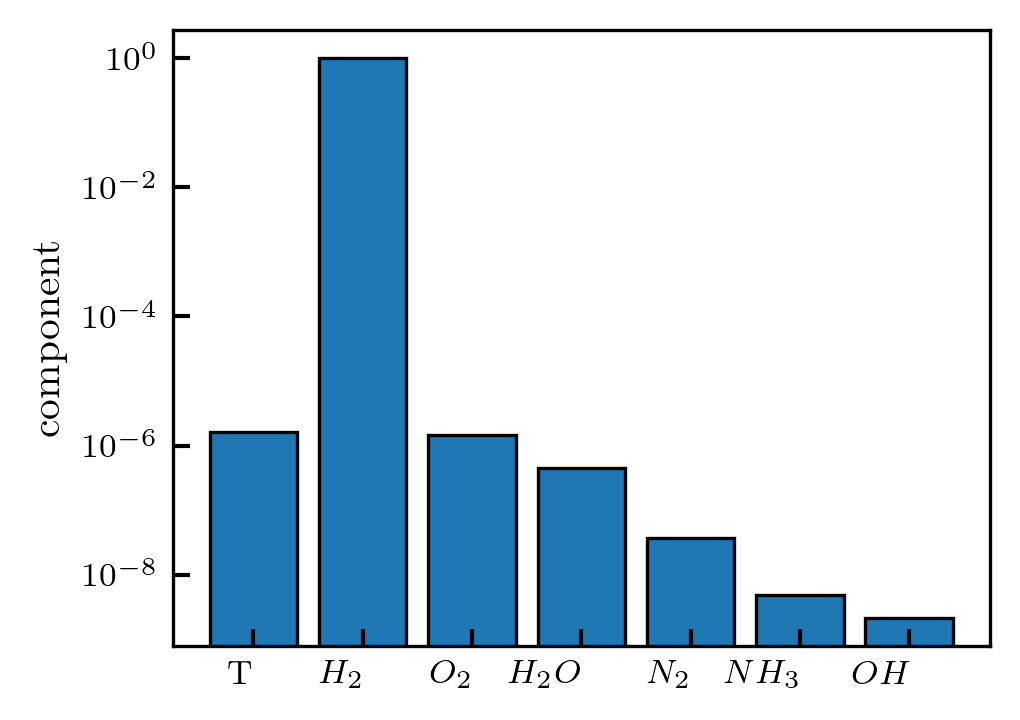

In [143]:
# %% [code]
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1) paper‐quality defaults
mpl.rcParams.update({
    "font.size":       10,
    "axes.linewidth":  0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.dpi":      300,
    "savefig.dpi":     300,
})

# 2) load data
df_evec  = pd.read_csv(os.path.join(plot_dir, "eigenvector_PC1.csv"))
species  = df_evec['species'].tolist()
pc1_vals = df_evec['PC1'].values

# 3) build math‐text labels: drop "X_", subscript digits
labels = []
for sp in species:
    if sp == "T":
        labels.append("T")
    else:
        base = sp.replace("X_", "")
        # turn digits into subscript syntax: e.g. O2 -> O_{2}
        math_sp = re.sub(r"(\d+)", r"_{\1}", base)
        labels.append(f"${math_sp}$")

# 4) plot
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.bar(range(len(pc1_vals)), pc1_vals,
       edgecolor='k', linewidth=0.8)

ax.set_yscale('log')
ax.set_ylabel("component", fontsize=10)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0, ha='right', fontsize=8)

ax.tick_params(which='both', bottom=True, left=True)
ax.grid(False)

plt.tight_layout()

# 5) save
out_pdf = os.path.join(plot_dir, "eigenvector_PC1.pdf")
out_png = os.path.join(plot_dir, "eigenvector_PC1.png")
fig.savefig(out_pdf, format='pdf', bbox_inches='tight')
fig.savefig(out_png, format='png', bbox_inches='tight')

plt.show()

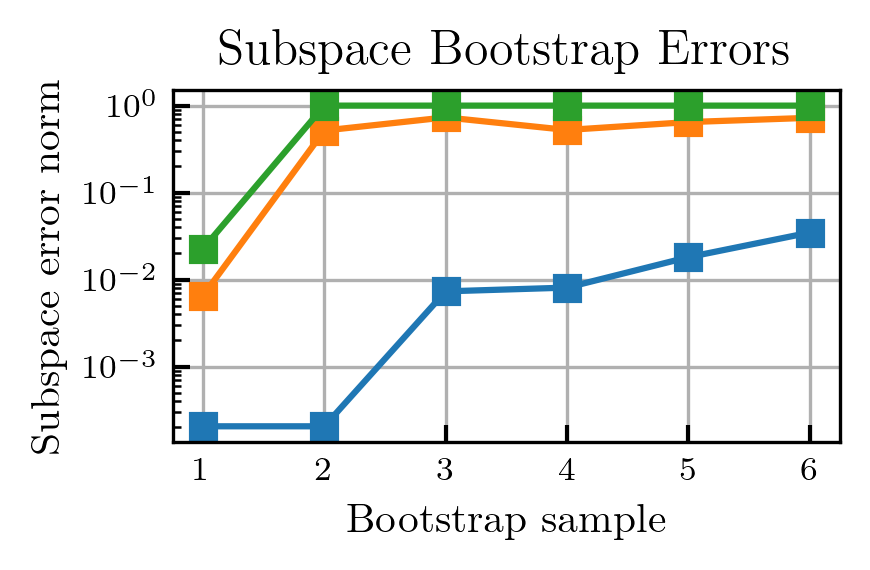

In [144]:

# %% [code]
# 3) Subspace bootstrap errors
#    (if subspace_dim=1 then this is just a vector of error magnitudes)
sub_err = np.loadtxt(os.path.join(plot_dir, "subspace_errors.csv"),
                     delimiter=",", skiprows=1)

plt.figure(figsize=(3,2))
plt.plot(np.arange(1, len(sub_err)+1), sub_err, 's-')
plt.xlabel("Bootstrap sample")
plt.ylabel("Subspace error norm")
plt.title("Subspace Bootstrap Errors")
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.show()



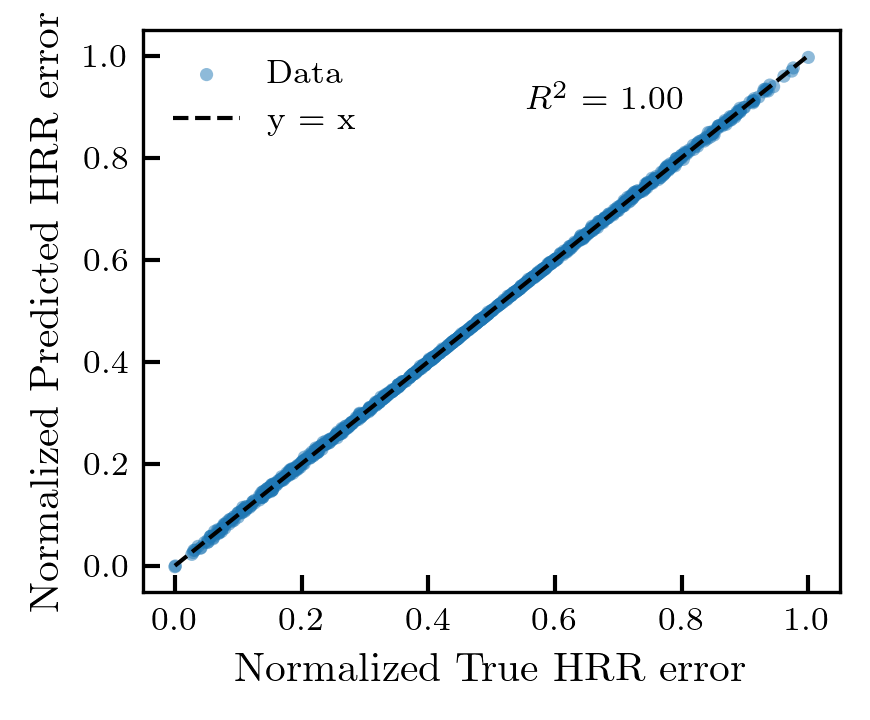

Wrote normalized predict-vs-true plot to figs/NH3_NP_CF/UQ_OH_analysis_noise_10/N_30/plots/predict_vs_true_qphd_norm.pdf


In [145]:
# %% [code]
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) load the predict-vs-true data we saved earlier
df = pd.read_csv(os.path.join(plot_dir, "predict_vs_true_qphd.csv"))
f_true = df['f_true'].values
f_pred = df['f_pred'].values

# 2) compute R² via Pearson r² (unchanged by linear scaling)
r  = np.corrcoef(f_true, f_pred)[0,1]
R2 = r**2

# 3) min–max normalize to [0,1] using f_true range
f_min, f_max = f_true.min(), f_true.max()
f_true_n = (f_true - f_min) / (f_max - f_min)
f_pred_n = (f_pred - f_min) / (f_max - f_min)

# 4) plot
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.scatter(
    f_true_n,
    f_pred_n,
    s=10,
    c='tab:blue',
    alpha=0.5,
    edgecolors='none',
    label="Data"
)

# 1:1 reference line on normalized scale
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label="y = x")

# annotate R² near the diagonal
ax.text(
    0.55, 0.90,
    "$R^2$ = {:.2f}".format(R2),
    transform=ax.transAxes,
    color='k',
    fontsize=8,
    va='top', ha='left'
)

ax.set_xlabel("Normalized True HRR error")
ax.set_ylabel("Normalized Predicted HRR error")

# legend for the 1:1 line
ax.legend(frameon=False, fontsize=8, loc='upper left')

# remove grid and top/right spines
ax.grid(False)
# for side in ['top', 'right']:
#     ax.spines[side].set_visible(False)

plt.tight_layout()
plt.show()

# 5) save to PDF
out_pdf = os.path.join(plot_dir, "predict_vs_true_qphd_norm.pdf")
fig.savefig(out_pdf, format='pdf', bbox_inches='tight')
print("Wrote normalized predict-vs-true plot to", out_pdf)